In [431]:
#Dependencies and Setup
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from pprint import pprint
import os
import csv
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st
import numpy as np





In [389]:
# url for GET requests to retrieve vaccination data
url="https://data.cdc.gov/resource/unsk-b7fc.json"
query_url="https://data.cdc.gov/resource/unsk-b7fc.json?$query=SELECT%0A%20%20%60date%60%2C%0A%20%20%60mmwr_week%60%2C%0A%20%20%60location%60%2C%0A%20%20%60distributed%60%2C%0A%20%20%60distributed_janssen%60%2C%0A%20%20%60distributed_moderna%60%2C%0A%20%20%60distributed_pfizer%60%2C%0A%20%20%60distributed_novavax%60%2C%0A%20%20%60distributed_unk_manuf%60%2C%0A%20%20%60dist_per_100k%60%2C%0A%20%20%60distributed_per_100k_5plus%60%2C%0A%20%20%60distributed_per_100k_12plus%60%2C%0A%20%20%60distributed_per_100k_18plus%60%2C%0A%20%20%60distributed_per_100k_65plus%60%2C%0A%20%20%60administered%60%2C%0A%20%20%60administered_5plus%60%2C%0A%20%20%60administered_12plus%60%2C%0A%20%20%60administered_18plus%60%2C%0A%20%20%60administered_65plus%60%2C%0A%20%20%60administered_janssen%60%2C%0A%20%20%60administered_moderna%60%2C%0A%20%20%60administered_pfizer%60%2C%0A%20%20%60administered_novavax%60%2C%0A%20%20%60administered_unk_manuf%60%2C%0A%20%20%60admin_per_100k%60%2C%0A%20%20%60admin_per_100k_5plus%60%2C%0A%20%20%60admin_per_100k_12plus%60%2C%0A%20%20%60admin_per_100k_18plus%60%2C%0A%20%20%60admin_per_100k_65plus%60%2C%0A%20%20%60recip_administered%60%2C%0A%20%20%60administered_dose1_recip%60%2C%0A%20%20%60administered_dose1_pop_pct%60%2C%0A%20%20%60administered_dose1_recip_5plus%60%2C%0A%20%20%60administered_dose1_recip_5pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_12plus%60%2C%0A%20%20%60administered_dose1_recip_12pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_18plus%60%2C%0A%20%20%60administered_dose1_recip_18pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_65plus%60%2C%0A%20%20%60administered_dose1_recip_65pluspop_pct%60%2C%0A%20%20%60series_complete_yes%60%2C%0A%20%20%60series_complete_pop_pct%60%2C%0A%20%20%60series_complete_5plus%60%2C%0A%20%20%60series_complete_5pluspop_pct%60%2C%0A%20%20%60series_complete_12plus%60%2C%0A%20%20%60series_complete_12pluspop%60%2C%0A%20%20%60series_complete_18plus%60%2C%0A%20%20%60series_complete_18pluspop%60%2C%0A%20%20%60series_complete_65plus%60%2C%0A%20%20%60series_complete_65pluspop%60%2C%0A%20%20%60series_complete_janssen%60%2C%0A%20%20%60series_complete_moderna%60%2C%0A%20%20%60series_complete_pfizer%60%2C%0A%20%20%60series_complete_novavax%60%2C%0A%20%20%60series_complete_unk_manuf%60%2C%0A%20%20%60series_complete_janssen_5plus%60%2C%0A%20%20%60series_complete_moderna_5plus%60%2C%0A%20%20%60series_complete_pfizer_5plus%60%2C%0A%20%20%60series_complete_unk_manuf_5plus%60%2C%0A%20%20%60series_complete_janssen_12plus%60%2C%0A%20%20%60series_complete_moderna_12plus%60%2C%0A%20%20%60series_complete_pfizer_12plus%60%2C%0A%20%20%60series_complete_unk_manuf_1%60%2C%0A%20%20%60series_complete_janssen_18plus%60%2C%0A%20%20%60series_complete_moderna_18plus%60%2C%0A%20%20%60series_complete_pfizer_18plus%60%2C%0A%20%20%60series_complete_unk_manuf_2%60%2C%0A%20%20%60series_complete_janssen_65plus%60%2C%0A%20%20%60series_complete_moderna_65plus%60%2C%0A%20%20%60series_complete_pfizer_65plus%60%2C%0A%20%20%60series_complete_unk_manuf_3%60%2C%0A%20%20%60additional_doses%60%2C%0A%20%20%60additional_doses_vax_pct%60%2C%0A%20%20%60additional_doses_5plus%60%2C%0A%20%20%60additional_doses_5plus_vax_pct%60%2C%0A%20%20%60additional_doses_12plus%60%2C%0A%20%20%60additional_doses_12plus_vax_pct%60%2C%0A%20%20%60additional_doses_18plus%60%2C%0A%20%20%60additional_doses_18plus_vax_pct%60%2C%0A%20%20%60additional_doses_50plus%60%2C%0A%20%20%60additional_doses_50plus_vax_pct%60%2C%0A%20%20%60additional_doses_65plus%60%2C%0A%20%20%60additional_doses_65plus_vax_pct%60%2C%0A%20%20%60additional_doses_moderna%60%2C%0A%20%20%60additional_doses_pfizer%60%2C%0A%20%20%60additional_doses_janssen%60%2C%0A%20%20%60additional_doses_unk_manuf%60%2C%0A%20%20%60second_booster%60%2C%0A%20%20%60second_booster_50plus%60%2C%0A%20%20%60second_booster_50plus_vax_pct%60%2C%0A%20%20%60second_booster_65plus%60%2C%0A%20%20%60second_booster_65plus_vax_pct%60%2C%0A%20%20%60second_booster_janssen%60%2C%0A%20%20%60second_booster_moderna%60%2C%0A%20%20%60second_booster_pfizer%60%2C%0A%20%20%60second_booster_unk_manuf%60%2C%0A%20%20%60administered_bivalent%60%2C%0A%20%20%60admin_bivalent_pfr%60%2C%0A%20%20%60admin_bivalent_mod%60%2C%0A%20%20%60dist_bivalent_pfr%60%2C%0A%20%20%60dist_bivalent_mod%60%2C%0A%20%20%60bivalent_booster_5plus%60%2C%0A%20%20%60bivalent_booster_5plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_12plus%60%2C%0A%20%20%60bivalent_booster_12plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_18plus%60%2C%0A%20%20%60bivalent_booster_18plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_65plus%60%2C%0A%20%20%60bivalent_booster_65plus_pop_pct%60%0AWHERE%0A%20%20%60date%60%0A%20%20%20%20BETWEEN%20%222022-01-01T00%3A00%3A00%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20AND%20%222022-12-31T00%3A00%3A00%22%20%3A%3A%20floating_timestamp"


In [390]:
#print the response object to the console
print(requests.get(query_url))

<Response [200]>


In [391]:
#pretty print the output of json
response=requests.get(query_url).json()
#print(json.dumps(response,indent=4, sort_keys=True))
pprint(response)

[{'additional_doses': '734754',
  'additional_doses_18plus': '731287',
  'additional_doses_18plus_vax_pct': '33.2',
  'additional_doses_50plus': '559008',
  'additional_doses_50plus_vax_pct': '44.9',
  'additional_doses_65plus': '350338',
  'additional_doses_65plus_vax_pct': '55.7',
  'additional_doses_janssen': '9900',
  'additional_doses_moderna': '321754',
  'additional_doses_pfizer': '403071',
  'additional_doses_unk_manuf': '29',
  'additional_doses_vax_pct': '31.4',
  'admin_per_100k': '122002',
  'admin_per_100k_12plus': '143161',
  'admin_per_100k_18plus': '149706',
  'admin_per_100k_5plus': '130457',
  'admin_per_100k_65plus': '222922',
  'administered': '5671632',
  'administered_12plus': '5616645',
  'administered_18plus': '5331274',
  'administered_5plus': '5671379',
  'administered_65plus': '1651898',
  'administered_dose1_pop_pct': '57.6',
  'administered_dose1_recip': '2677354',
  'administered_dose1_recip_12plus': '2638402',
  'administered_dose1_recip_12pluspop_pct': '

In [392]:
#create data frame from json for vaccination dataset
original_data_frame=pd.DataFrame(response)
original_data_frame

date mmwr_week location distributed  \
0    2022-01-01T00:00:00.000        52       LA     6872750   
1    2022-01-01T00:00:00.000        52       KS     5190675   
2    2022-01-01T00:00:00.000        52       OR     8477585   
3    2022-01-01T00:00:00.000        52       MO     9887935   
4    2022-01-01T00:00:00.000        52       AR     4989160   
..                       ...       ...      ...         ...   
995  2022-01-16T00:00:00.000         2       US   651561015   
996  2022-01-16T00:00:00.000         2       WI    10524275   
997  2022-01-16T00:00:00.000         2       MH       68980   
998  2022-01-16T00:00:00.000         2       MS     4963115   
999  2022-01-16T00:00:00.000         2       RI     2402665   

    distributed_janssen distributed_moderna distributed_pfizer  \
0                314500             2558900            3999350   
1                249000             1942240            2999435   
2                452300             3124020            4901265   
3                410500             3526700            5950735   
4                247500             1922840            2818820   
..                  ...                 ...                ...   
995            29887900           239546020          382127095   
996              449600             3911140            6163535   
997               12100               47700               9180   
998              218800             1972560            2771755   
999               87000              902540            1413125   

    distributed_unk_manuf dist_per_100k distributed_per_100k_5plus  ...  \
0                       0        147839                     158091  ...   
1                       0        178171                     190275  ...   
2                       0        200998                     212475  ...   
3                       0        161109                     171387  ...   
4                       0        165324                     176337  ...   
..                    ...           ...                        ...  ...   
995                     0        196248                     208656  ...   
996                     0        180754                     191631  ...   
997                     0         88731                      99685  ...   
998                     0        166763                     177719  ...   
999                     0        226803                     239109  ...   

    additional_doses_18plus additional_doses_18plus_vax_pct  \
0                    731287                            33.2   
1                    557370                            36.8   
2                   1098338                            42.9   
3                   1095320                            36.4   
4                    465439                            32.8   
..                      ...                             ...   
995                78868804                            41.5   
996                 1781876                            53.6   
997                    2008                             9.3   
998                  465867                            34.3   
999                  392079                            52.8   

    additional_doses_50plus additional_doses_50plus_vax_pct  \
0                    559008                            44.9   
1                    394213                            48.5   
2                    727525                            55.9   
3                    802774                            47.5   
4                    351295                            44.3   
..                      ...                             ...   
995                52315671                            53.1   
996                 1228261                            65.7   
997                     776                              15   
998                  365380                            46.1   
999                  253478                            65.3   

    additional_doses_65plus additional_doses_65plus_vax_pct

In [393]:
#organize the data frame with desired columns location and doses administered per 100K.
vaccine_organized_data=original_data_frame[['location','admin_per_100k']]
vaccine_organized_data.head()


location admin_per_100k
0       LA         122002
1       KS         140268
2       OR         162471
3       MO         132154
4       AR         125933

In [394]:
#Create dictionary of states to map them with the states in Dataset
state_mapping = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky',
    'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MS': 'Mississippi',
    'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada',
    'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VA': 'Virginia', 'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin',
    'WV': 'West Virginia', 'WY': 'Wyoming', 'HI':'Hawaii'}

In [395]:
# clean dataframe
# copy the original data to manuplate it.
copy_vaccine_organized_data=vaccine_organized_data.copy()
copy_vaccine_organized_data['admin_per_100k'] = copy_vaccine_organized_data['admin_per_100k'].astype(float)
#group all the states with group by method.
copy_vaccine_organized_data= copy_vaccine_organized_data.groupby('location').sum()
# create a new column of full names of states
copy_vaccine_organized_data['State'] = copy_vaccine_organized_data.index.map(state_mapping)
# drop some states that have NaN
copy_vaccine_organized_data= copy_vaccine_organized_data.dropna(how = 'any')
#print length to verify 
print(len(copy_vaccine_organized_data))
copy_vaccine_organized_data


50


admin_per_100k           State
location                                
AK             2269886.0          Alaska
AL             1750396.0         Alabama
AR             2049642.0        Arkansas
AZ             2203227.0         Arizona
CA             2555469.0      California
CO             2689812.0        Colorado
CT             3059080.0     Connecticut
DE             2649524.0        Delaware
FL             2550729.0         Florida
GA             1913938.0         Georgia
HI             2685280.0          Hawaii
IA             2382243.0            Iowa
ID             1834388.0           Idaho
IL             2558519.0        Illinois
IN             2056993.0         Indiana
KS             2280262.0          Kansas
KY             2010495.0        Kentucky
LA             1977650.0       Louisiana
MA             2888746.0   Massachusetts
MD             2818868.0        Maryland
ME             2852870.0           Maine
MI             2278793.0        Michigan
MN             2473408.0       Minnesota
MO             2001100.0        Missouri
MS             1888207.0     Mississippi
MT             2184189.0         Montana
NC             2321929.0  North Carolina
ND             2021257.0    North Dakota
NE             2403713.0        Nebraska
NH             2877530.0   New Hampshire
NJ             2752341.0      New Jersey
NM             2668308.0      New Mexico
NV             2144529.0          Nevada
NY             2701324.0        New York
OH             2228075.0            Ohio
OK             2185604.0        Oklahoma
OR             2633818.0          Oregon
PA             2565980.0    Pennsylvania
RI             3016435.0    Rhode Island
SC             1992554.0  South Carolina
SD             2319731.0    South Dakota
TN             1989049.0       Tennessee
TX             2139589.0           Texas
UT             2292928.0            Utah
VA             2770094.0        Virginia
VT             3064566.0         Vermont
WA             2693217.0      Washington
WI             2553425.0       Wisconsin
WV             2254893.0   West Virginia
WY             1797194.0         Wyoming

In [396]:
#import the csv for second dataset for median income.
csvpath=os.path.join('..','Angad','income_data.csv')

In [397]:
#open the csv with csv reader
with open(csvpath) as csvfile:
    csvreader=csv.reader(csvfile, delimiter=',')
    print (csvreader)
    csv_header=next(csvreader)
    print(f"CSV Header: {csv_header}")
    #for row in csvreader:
    #    print(row)

CSV Header: ['\ufeff"Label (Grouping)"', 'Alabama!!Households!!Estimate', 'Alabama!!Households!!Margin of Error', 'Alabama!!Families!!Estimate', 'Alabama!!Families!!Margin of Error', 'Alabama!!Married-couple families!!Estimate', 'Alabama!!Married-couple families!!Margin of Error', 'Alabama!!Nonfamily households!!Estimate', 'Alabama!!Nonfamily households!!Margin of Error', 'Alaska!!Households!!Estimate', 'Alaska!!Households!!Margin of Error', 'Alaska!!Families!!Estimate', 'Alaska!!Families!!Margin of Error', 'Alaska!!Married-couple families!!Estimate', 'Alaska!!Married-couple families!!Margin of Error', 'Alaska!!Nonfamily households!!Estimate', 'Alaska!!Nonfamily households!!Margin of Error', 'Arizona!!Households!!Estimate', 'Arizona!!Households!!Margin of Error', 'Arizona!!Families!!Estimate', 'Arizona!!Families!!Margin of Error', 'Arizona!!Married-couple families!!Estimate', 'Arizona!!Married-couple families!!Margin of Error', 'Arizona!!Nonfamily households!!Estimate', 'Arizona!!Nonfa

In [398]:
# Create a data list to craete a dataframe from CSV FILE
# Create an empty list to store the CSV data
data = []

# Open the CSV file and read its contents
with open(csvpath, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    
    # Store the CSV data in the 'data' list
    for row in csvreader:
        data.append(row)

# Create a DataFrame from the 'data' list
income_df = pd.DataFrame(data, columns=data[0])

# Remove the header row from the DataFrame (if needed)
income_df =income_df[1:]

# Now, 'df' is your DataFrame containing the CSV data
print(income_df)

                           ﻿"Label (Grouping)" Alabama!!Households!!Estimate  \
1                                        Total                     2,016,448   
2                            Less than $10,000                          7.6%   
3                           $10,000 to $14,999                          5.2%   
4                           $15,000 to $24,999                          9.3%   
5                           $25,000 to $34,999                          8.6%   
6                           $35,000 to $49,999                         12.0%   
7                           $50,000 to $74,999                         16.7%   
8                           $75,000 to $99,999                         12.6%   
9                         $100,000 to $149,999                         14.9%   
10                        $150,000 to $199,999                          6.4%   
11                            $200,000 or more                          6.7%   
12                     Median income (do

In [399]:
# to check the columns of data frame
income_df.columns

Index(['﻿"Label (Grouping)"', 'Alabama!!Households!!Estimate',
       'Alabama!!Households!!Margin of Error', 'Alabama!!Families!!Estimate',
       'Alabama!!Families!!Margin of Error',
       'Alabama!!Married-couple families!!Estimate',
       'Alabama!!Married-couple families!!Margin of Error',
       'Alabama!!Nonfamily households!!Estimate',
       'Alabama!!Nonfamily households!!Margin of Error',
       'Alaska!!Households!!Estimate',
       ...
       'Wyoming!!Nonfamily households!!Estimate',
       'Wyoming!!Nonfamily households!!Margin of Error',
       'Puerto Rico!!Households!!Estimate',
       'Puerto Rico!!Households!!Margin of Error',
       'Puerto Rico!!Families!!Estimate',
       'Puerto Rico!!Families!!Margin of Error',
       'Puerto Rico!!Married-couple families!!Estimate',
       'Puerto Rico!!Married-couple families!!Margin of Error',
       'Puerto Rico!!Nonfamily households!!Estimate',
       'Puerto Rico!!Nonfamily households!!Margin of Error'],
      dtype='o

In [400]:
#organize the data frame with desired columns
income_organized_dataframe=income_df[['Alabama!!Households!!Estimate',
                                'Alaska!!Households!!Estimate',
                                "Arizona!!Households!!Estimate",
                                "Arkansas!!Households!!Estimate",
                                "California!!Households!!Estimate",
                                "Colorado!!Households!!Estimate",
                                "Connecticut!!Households!!Estimate",
                                "Delaware!!Households!!Estimate",
                                "District of Columbia!!Households!!Estimate",
                                "Florida!!Households!!Estimate",
                                "Georgia!!Households!!Estimate",
                                "Hawaii!!Households!!Estimate",
                                "Idaho!!Households!!Estimate",
                                "Illinois!!Households!!Estimate",
                                "Indiana!!Households!!Estimate",
                                "Iowa!!Households!!Estimate",
                                "Kansas!!Households!!Estimate",
                                "Kentucky!!Households!!Estimate",
                                "Louisiana!!Households!!Estimate",
                                "Maine!!Households!!Estimate",
                                "Maryland!!Households!!Estimate",
                                "Massachusetts!!Households!!Estimate",
                                "Michigan!!Households!!Estimate",
                                "Minnesota!!Households!!Estimate",
                                "Mississippi!!Households!!Estimate",
                                "Missouri!!Households!!Estimate",
                                "Montana!!Households!!Estimate",
                                "Nebraska!!Households!!Estimate",
                                "Nevada!!Households!!Estimate",
                                "New Hampshire!!Households!!Estimate",
                                "New Jersey!!Households!!Estimate",
                                "New Mexico!!Households!!Estimate",
                                "New York!!Households!!Estimate",
                                "North Carolina!!Households!!Estimate",
                                "North Dakota!!Households!!Estimate",
                                "Ohio!!Households!!Estimate",
                                "Oklahoma!!Households!!Estimate",
                                "Oregon!!Households!!Estimate",
                                "Pennsylvania!!Households!!Estimate",
                                "Rhode Island!!Households!!Estimate",
                                "South Carolina!!Households!!Estimate",
                                "South Dakota!!Households!!Estimate",
                                "Tennessee!!Households!!Estimate",
                                "Texas!!Households!!Estimate",
                                "Utah!!Households!!Estimate",
                                "Vermont!!Households!!Estimate",
                                "Virginia!!Households!!Estimate",
                                "Washington!!Households!!Estimate",
                                "West Virginia!!Households!!Estimate",
                                "Wisconsin!!Households!!Estimate",
                                "Wyoming!!Households!!Estimate",
                                ]]
income_organized_dataframe


Alabama!!Households!!Estimate Alaska!!Households!!Estimate  \
1                      2,016,448                      274,574   
2                           7.6%                         4.4%   
3                           5.2%                         2.5%   
4                           9.3%                         5.4%   
5                           8.6%                         5.3%   
6                          12.0%                         9.1%   
7                          16.7%                        15.8%   
8                          12.6%                        13.2%   
9                          14.9%                        21.8%   
10                          6.4%                        11.1%   
11                          6.7%                        11.4%   
12                        59,674                       88,121   
13                        82,956                      109,524   
14                                                              
15                         38.9%                        35.9%   
16                           (X)                          (X)   
17                           (X)                          (X)   

   Arizona!!Households!!Estimate Arkansas!!Households!!Estimate  \
1                      2,850,377                      1,216,207   
2                           5.4%                           7.3%   
3                           3.0%                           5.9%   
4                           6.2%                           9.5%   
5                           7.3%                           9.1%   
6                          11.0%                          13.5%   
7                          17.3%                          18.1%   
8                          13.8%                          12.6%   
9                          17.8%                          13.4%   
10                          8.6%                           5.1%   
11                          9.6%                           5.5%   
12                        74,568                         55,432   
13                       101,316                         76,853   
14                                                                
15                         38.9%                          38.4%   
16                           (X)                            (X)   
17                           (X)                            (X)   

   California!!Households!!Estimate Colorado!!Households!!Estimate  \
1                        13,550,586                      2,384,584   
2                              4.8%                           4.1%   
3                              3.2%                           2.5%   
4                              5.5%                           5.4%   
5                              5.9%                           5.8%   
6                              8.5%                           9.2%   
7                             13.8%                          15.1%   
8                             12.0%                          13.4%   
9                             17.6%                          19.0%   
10                            10.6%                          10.7%   
11                            18.0%                          14.7%   
12                           91,551                         89,302   
13                          131,504                        119,039   
14                                                                   
15                            39.9%                          34.0%   
16                              (X)                            (X)   
17                              (X)                            (X)   

   Connecticut!!Households!!Estimate Delaware!!Households!!Estimate  \
1                          1,433,635                        402,334   
2                               5.1%                           4.0%   
3                               3.2%                           2.6%   
4                               5.9%                           5.8%   
5        

In [401]:
#Create new column as a header
new_column_label_values=["Total",
                    "Less than $10,000",
                    "$10,000 to $14,999",
                    "$15,000 to $24,999",
                    "$25,000 to $34,999",
                    "$35,000 to $49,999",
                    "$50,000 to $74,999",
                    "$75,000 to $99,999",
                    "$100,000 to $149,999",
                    "$150,000 to $199,999",
                    "$200,000 or more",
                    "Median income (dollars)",
                    "Mean income (dollars)",
                    "PERCENT ALLOCATED",
                    "Household income in the past 12 months",
                    "Family income in the past 12 months",
                    "Nonfamily income in the past 12 months"
                    ]

In [402]:
# add the new column created into data frame
income_organized_dataframe["new_column_label_values"]=new_column_label_values
income_organized_dataframe

Alabama!!Households!!Estimate Alaska!!Households!!Estimate  \
1                      2,016,448                      274,574   
2                           7.6%                         4.4%   
3                           5.2%                         2.5%   
4                           9.3%                         5.4%   
5                           8.6%                         5.3%   
6                          12.0%                         9.1%   
7                          16.7%                        15.8%   
8                          12.6%                        13.2%   
9                          14.9%                        21.8%   
10                          6.4%                        11.1%   
11                          6.7%                        11.4%   
12                        59,674                       88,121   
13                        82,956                      109,524   
14                                                              
15                         38.9%                        35.9%   
16                           (X)                          (X)   
17                           (X)                          (X)   

   Arizona!!Households!!Estimate Arkansas!!Households!!Estimate  \
1                      2,850,377                      1,216,207   
2                           5.4%                           7.3%   
3                           3.0%                           5.9%   
4                           6.2%                           9.5%   
5                           7.3%                           9.1%   
6                          11.0%                          13.5%   
7                          17.3%                          18.1%   
8                          13.8%                          12.6%   
9                          17.8%                          13.4%   
10                          8.6%                           5.1%   
11                          9.6%                           5.5%   
12                        74,568                         55,432   
13                       101,316                         76,853   
14                                                                
15                         38.9%                          38.4%   
16                           (X)                            (X)   
17                           (X)                            (X)   

   California!!Households!!Estimate Colorado!!Households!!Estimate  \
1                        13,550,586                      2,384,584   
2                              4.8%                           4.1%   
3                              3.2%                           2.5%   
4                              5.5%                           5.4%   
5                              5.9%                           5.8%   
6                              8.5%                           9.2%   
7                             13.8%                          15.1%   
8                             12.0%                          13.4%   
9                             17.6%                          19.0%   
10                            10.6%                          10.7%   
11                            18.0%                          14.7%   
12                           91,551                         89,302   
13                          131,504                        119,039   
14                                                                   
15                            39.9%                          34.0%   
16                              (X)                            (X)   
17                              (X)                            (X)   

   Connecticut!!Households!!Estimate Delaware!!Households!!Estimate  \
1                          1,433,635                        402,334   
2                               5.1%                           4.0%   
3                               3.2%                           2.6%   
4                               5.9%                           5.8%   
5        

In [403]:
# Rename the columns to make them readable
renamed_df=income_organized_dataframe.rename(columns={'Alabama!!Households!!Estimate': "Alabama",
                                'Alaska!!Households!!Estimate': "Alaska",
                                "Arizona!!Households!!Estimate":"Arizona",
                                "Arkansas!!Households!!Estimate":"Arkansas",
                                "California!!Households!!Estimate":"California",
                                "Colorado!!Households!!Estimate":"Colorado",
                                "Connecticut!!Households!!Estimate":"Connecticut",
                                "Delaware!!Households!!Estimate":"Delaware",
                                "District of Columbia!!Households!!Estimate":"District of Columbia",
                                "Florida!!Households!!Estimate":"Florida",
                                "Georgia!!Households!!Estimate":"Georgia",
                                "Hawaii!!Households!!Estimate":"Hawaii",
                                "Idaho!!Households!!Estimate":"Idaho",
                                "Illinois!!Households!!Estimate":"Illinois",
                                "Indiana!!Households!!Estimate":"Indiana",
                                "Iowa!!Households!!Estimate":"Iowa",
                                "Kansas!!Households!!Estimate":"Kansas",
                                "Kentucky!!Households!!Estimate":"Kentucky",
                                "Louisiana!!Households!!Estimate":"Louisiana",
                                "Maine!!Households!!Estimate":"Maine",
                                "Maryland!!Households!!Estimate":"Maryland",
                                "Massachusetts!!Households!!Estimate":"Massachusetts",
                                "Michigan!!Households!!Estimate":"Michigan",
                                "Minnesota!!Households!!Estimate":"Minnesota",
                                "Mississippi!!Households!!Estimate":"Mississippi",
                                "Missouri!!Households!!Estimate":"Missouri",
                                "Montana!!Households!!Estimate":"Montana",
                                "Nebraska!!Households!!Estimate":"Nebraska",
                                "Nevada!!Households!!Estimate":"Nevada",
                                "New Hampshire!!Households!!Estimate":"New Hampshire",
                                "New Jersey!!Households!!Estimate":"New Jersey",
                                "New Mexico!!Households!!Estimate":"New Mexico",
                                "New York!!Households!!Estimate":"New York",
                                "North Carolina!!Households!!Estimate":"North Carolina",
                                "North Dakota!!Households!!Estimate":"North Dakota",
                                "Ohio!!Households!!Estimate":"Ohio",
                                "Oklahoma!!Households!!Estimate":"Oklahoma",
                                "Oregon!!Households!!Estimate":"Oregon",
                                "Pennsylvania!!Households!!Estimate":"Pennsylvania",
                                "Rhode Island!!Households!!Estimate":"Rhode Island",
                                "South Carolina!!Households!!Estimate":"South Carolina",
                                "South Dakota!!Households!!Estimate":"South Dakota",
                                "Tennessee!!Households!!Estimate":"Tennessee",
                                "Texas!!Households!!Estimate":"Texas",
                                "Utah!!Households!!Estimate":"Utah",
                                "Vermont!!Households!!Estimate":"Vermont",
                                "Virginia!!Households!!Estimate":"Virginia",
                                "Washington!!Households!!Estimate":"Washington",
                                "West Virginia!!Households!!Estimate":"West Virginia",
                                "Wisconsin!!Households!!Estimate":"Wisconsin",
                                "Wyoming!!Households!!Estimate":"Wyoming",
                                "new_column_label_values":"Header"
                            

                                                    })
renamed_df.head()                                                   

Alabama   Alaska    Arizona   Arkansas  California   Colorado  \
1  2,016,448  274,574  2,850,377  1,216,207  13,550,586  2,384,584   
2       7.6%     4.4%       5.4%       7.3%        4.8%       4.1%   
3       5.2%     2.5%       3.0%       5.9%        3.2%       2.5%   
4       9.3%     5.4%       6.2%       9.5%        5.5%       5.4%   
5       8.6%     5.3%       7.3%       9.1%        5.9%       5.8%   

  Connecticut Delaware District of Columbia    Florida  ...  Tennessee  \
1   1,433,635  402,334              326,970  8,826,394  ...  2,846,684   
2        5.1%     4.0%                 6.8%       5.6%  ...       5.4%   
3        3.2%     2.6%                 2.8%       3.5%  ...       4.3%   
4        5.9%     5.8%                 5.1%       7.2%  ...       7.8%   
5        6.0%     7.1%                 4.6%       8.0%  ...       8.2%   

        Texas       Utah  Vermont   Virginia Washington West Virginia  \
1  11,087,708  1,129,660  277,090  3,380,607  3,079,953       736,341   
2        5.5%       3.0%     4.0%       4.9%       4.5%          7.1%   
3        3.6%       2.4%     3.8%       3.2%       2.8%          6.3%   
4        6.6%       4.1%     6.7%       5.8%       4.9%         10.5%   
5        7.8%       5.9%     8.1%       6.1%       5.4%          9.9%   

   Wisconsin  Wyoming              Header  
1  2,491,121  243,321               Total  
2       4.6%     5.2%   Less than $10,000  
3       3.5%     3.4%  $10,000 to $14,999  
4       7.0%     7.5%  $15,000 to $24,999  
5       7.4%     8.2%  $25,000 to $34,999  

[5 rows x 52 columns]

In [404]:
#set the header as an index
df=renamed_df.set_index("Header")
df

Alabama   Alaska    Arizona  \
Header                                                                  
Total                                   2,016,448  274,574  2,850,377   
Less than $10,000                            7.6%     4.4%       5.4%   
$10,000 to $14,999                           5.2%     2.5%       3.0%   
$15,000 to $24,999                           9.3%     5.4%       6.2%   
$25,000 to $34,999                           8.6%     5.3%       7.3%   
$35,000 to $49,999                          12.0%     9.1%      11.0%   
$50,000 to $74,999                          16.7%    15.8%      17.3%   
$75,000 to $99,999                          12.6%    13.2%      13.8%   
$100,000 to $149,999                        14.9%    21.8%      17.8%   
$150,000 to $199,999                         6.4%    11.1%       8.6%   
$200,000 or more                             6.7%    11.4%       9.6%   
Median income (dollars)                    59,674   88,121     74,568   
Mean income (dollars)                      82,956  109,524    101,316   
PERCENT ALLOCATED                                                       
Household income in the past 12 months      38.9%    35.9%      38.9%   
Family income in the past 12 months           (X)      (X)        (X)   
Nonfamily income in the past 12 months        (X)      (X)        (X)   

                                         Arkansas  California   Colorado  \
Header                                                                     
Total                                   1,216,207  13,550,586  2,384,584   
Less than $10,000                            7.3%        4.8%       4.1%   
$10,000 to $14,999                           5.9%        3.2%       2.5%   
$15,000 to $24,999                           9.5%        5.5%       5.4%   
$25,000 to $34,999                           9.1%        5.9%       5.8%   
$35,000 to $49,999                          13.5%        8.5%       9.2%   
$50,000 to $74,999                          18.1%       13.8%      15.1%   
$75,000 to $99,999                          12.6%       12.0%      13.4%   
$100,000 to $149,999                        13.4%       17.6%      19.0%   
$150,000 to $199,999                         5.1%       10.6%      10.7%   
$200,000 or more                             5.5%       18.0%      14.7%   
Median income (dollars)                    55,432      91,551     89,302   
Mean income (dollars)                      76,853     131,504    119,039   
PERCENT ALLOCATED                                                          
Household income in the past 12 months      38.4%       39.9%      34.0%   
Family income in the past 12 months           (X)         (X)        (X)   
Nonfamily income in the past 12 months        (X)         (X)        (X)   

                                       Connecticut Delaware  \
Header                                                        
Total                                    1,433,635  402,334   
Less than $10,000                             5.1%     4.0%   
$10,000 to $14,999                            3.2%     2.6%   
$15,000 to $24,999                            5.9%     5.8%   
$25,000 to $34,999                            6.0%     7.1%   
$35,000 to $49,999                            8.7%    10.4%   
$50,000 to $74,999                           13.8%    15.9%   
$75,000 to $99,999                           12.6%    13.9%   
$100,000 to $149,999                         17.7%    20.0%   
$150,000 to $199,999                         10.8%     9.4%   
$200,000 or more                             16.3%    10.8%   
Median income (dollars)                     88,429   82,174   
Mean income (dollars)                      128,160  105,438   
PERCENT ALLOCATED                                             
Household income in the past 12 months       39.0%    35.4%   
Family income in the past 12 months            (X)      (X)   
Nonfamily income in the past 12 months         (X)      (X)   

           

In [405]:
#pick the desired columns and lock them
df.loc["Median income (dollars)",:]

Alabama                  59,674
Alaska                   88,121
Arizona                  74,568
Arkansas                 55,432
California               91,551
Colorado                 89,302
Connecticut              88,429
Delaware                 82,174
District of Columbia    101,027
Florida                  69,303
Georgia                  72,837
Hawaii                   92,458
Idaho                    72,785
Illinois                 76,708
Indiana                  66,785
Iowa                     69,588
Kansas                   68,925
Kentucky                 59,341
Louisiana                55,416
Maine                    69,543
Maryland                 94,991
Massachusetts            94,488
Michigan                 66,986
Minnesota                82,338
Mississippi              52,719
Missouri                 64,811
Montana                  67,631
Nebraska                 69,597
Nevada                   72,333
New Hampshire            89,992
New Jersey               96,346
New Mexi

In [406]:
# Select the row with the label "Median income (dollars)"
median_income_row = df.loc["Median income (dollars)", :]

# Create a new DataFrame from the selected row
new_df = pd.DataFrame(median_income_row).reset_index()

# Rename the columns in the new DataFrame
new_df.columns = ["State", "Median Income"]

# Display the new DataFrame
print(new_df)



                   State Median Income
0                Alabama        59,674
1                 Alaska        88,121
2                Arizona        74,568
3               Arkansas        55,432
4             California        91,551
5               Colorado        89,302
6            Connecticut        88,429
7               Delaware        82,174
8   District of Columbia       101,027
9                Florida        69,303
10               Georgia        72,837
11                Hawaii        92,458
12                 Idaho        72,785
13              Illinois        76,708
14               Indiana        66,785
15                  Iowa        69,588
16                Kansas        68,925
17              Kentucky        59,341
18             Louisiana        55,416
19                 Maine        69,543
20              Maryland        94,991
21         Massachusetts        94,488
22              Michigan        66,986
23             Minnesota        82,338
24           Mississippi 

In [407]:
new_df.count()

State            51
Median Income    51
dtype: int64

In [408]:
merged_df=pd.merge(new_df,copy_vaccine_organized_data, on= 'State', how='right')
#merged_df=merged_df.sort_values(by= 'Median Income', ascending='True') 
merged_df = merged_df.sort_values(by='Median Income', ascending=True) 
merged_df

State Median Income  admin_per_100k
24     Mississippi        52,719       1888207.0
48   West Virginia        54,329       2254893.0
17       Louisiana        55,416       1977650.0
2         Arkansas        55,432       2049642.0
16        Kentucky        59,341       2010495.0
35        Oklahoma        59,673       2185604.0
1          Alabama        59,674       1750396.0
31      New Mexico        59,726       2668308.0
39  South Carolina        64,115       1992554.0
23        Missouri        64,811       2001100.0
41       Tennessee        65,254       1989049.0
34            Ohio        65,720       2228075.0
14         Indiana        66,785       2056993.0
21        Michigan        66,986       2278793.0
26  North Carolina        67,481       2321929.0
25         Montana        67,631       2184189.0
15          Kansas        68,925       2280262.0
8          Florida        69,303       2550729.0
20           Maine        69,543       2852870.0
11            Iowa        69,588       2382243.0
28        Nebraska        69,597       2403713.0
40    South Dakota        69,728       2319731.0
49         Wyoming        70,042       1797194.0
47       Wisconsin        70,996       2553425.0
37    Pennsylvania        71,798       2565980.0
27    North Dakota        71,970       2021257.0
42           Texas        72,284       2139589.0
32          Nevada        72,333       2144529.0
12           Idaho        72,785       1834388.0
9          Georgia        72,837       1913938.0
45         Vermont        73,991       3064566.0
3          Arizona        74,568       2203227.0
36          Oregon        75,657       2633818.0
13        Illinois        76,708       2558519.0
33        New York        79,557       2701324.0
38    Rhode Island        81,854       3016435.0
7         Delaware        82,174       2649524.0
22       Minnesota        82,338       2473408.0
44        Virginia        85,873       2770094.0
0           Alaska        88,121       2269886.0
6      Connecticut        88,429       3059080.0
43            Utah        89,168       2292928.0
5         Colorado        89,302       2689812.0
29   New Hampshire        89,992       2877530.0
46      Washington        91,306       2693217.0
4       California        91,551       2555469.0
10          Hawaii        92,458       2685280.0
18   Massachusetts        94,488       2888746.0
19        Maryland        94,991       2818868.0
30      New Jersey        96,346       2752341.0

In [409]:
# to verify teh count of columns
merged_df.count()

State             50
Median Income     50
admin_per_100k    50
dtype: int64

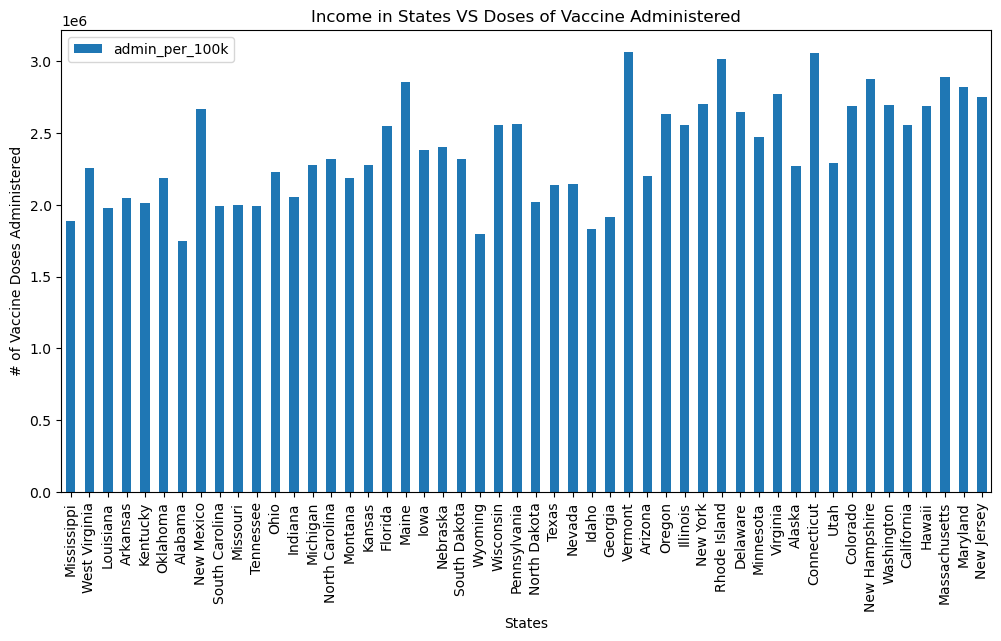

In [410]:
# create bar graph with number of doses administered vs states
fig, ax =plt.subplots(figsize=(12,6))
merged_df.plot('State', 'admin_per_100k', kind='bar', ax=ax)
# Set plot labels and title
plt.title('Income in States VS Doses of Vaccine Administered per 100K')
plt.xlabel('States with increasing order of income')
plt.ylabel('# of Vaccine Doses Administered per 100K')
plt.show()


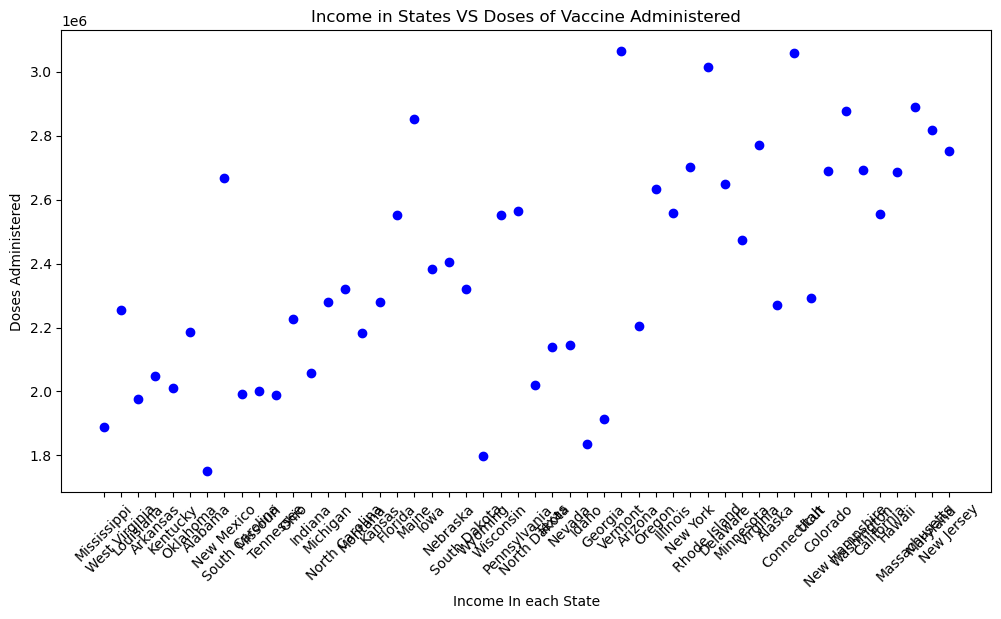

In [429]:
# Specify the x and y data
x = merged_df['State']
y = merged_df['admin_per_100k']

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y , marker='o', color='b')
plt.title('Income in States VS Doses of Vaccine Administered')
plt.xlabel('Income In each State')
plt.ylabel('Doses Administered')
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
# Display the plot
plt.show()


The correlation between median income and the doses administered per 100k is 0.65


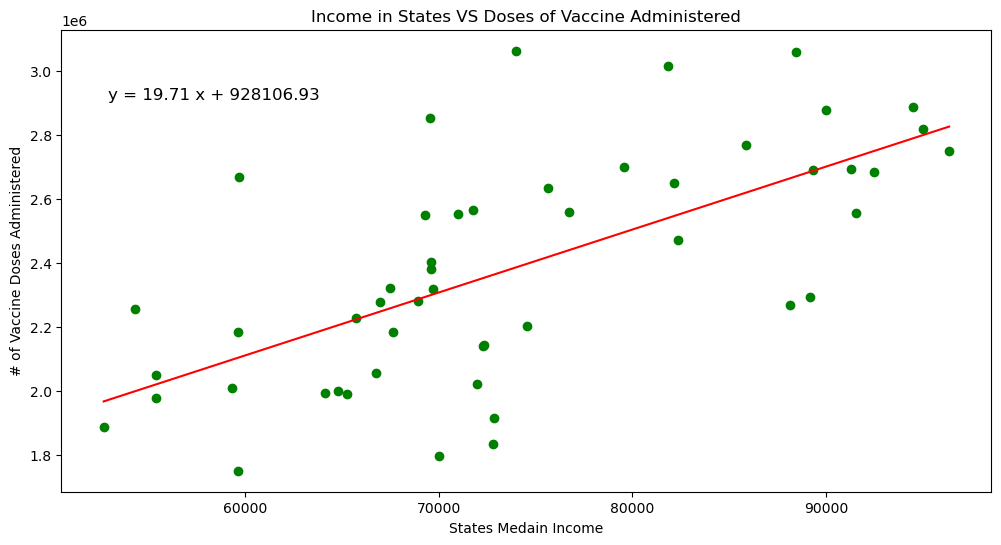

In [430]:
x_values=[]
y_values=[]
for index, rows in merged_df.iterrows():
    median_income=float(rows['Median Income'].replace(',',''))
    admin_per_100k=float(rows['admin_per_100k'])
    x_values.append(median_income)
    y_values.append(admin_per_100k)

# Calculate the correlation coefficient and a linear regression model 
#x = merged_df['Median Income']
#y = merged_df['administered']

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x_values, y_values, marker='o', color='g')
plt.title('Income in States VS Doses of Vaccine Administered')
plt.xlabel('States Medain Income')
plt.ylabel('# of Vaccine Doses Administered')
# Calculate the correlation coefficient
correlation_coefficient = round(st.pearsonr(x_values, y_values)[0], 2)
print(f"The correlation between median income and the doses administered per 100k is {correlation_coefficient}")
# Convert the x_values list to a numpy array
x_values = np.array(x_values, dtype=float)
# Perform linear regression
slope, intercept, r_value, p_value, std_err =st.linregress(x_values, y_values)

# Calculate the predicted values using the linear regression model
predicted_values = slope * x_values + intercept

# Add the equation of the line to the plot
equation_text = f'y = {slope:.2f} x + {intercept:.2f}'
plt.text(0.05, 0.85, equation_text, transform=plt.gca().transAxes, fontsize=12)


# Add the linear regression line to the scatter plot
plt.plot(x_values, predicted_values, color='red')


# Display the plot

plt.show()



A correlation coefficient of 0.65 indicates a moderate to strong positive correlation between median income and the number of vaccine doses administered per 100,000 people.

As median income increases in a given area, there is a tendency for a notable increase in the number of vaccine doses administered per 100,000 people.

The positive sign indicates that they tend to move in the same direction, which means that higher median incomes are associated with higher rates of vaccine doses administered per 100,000 people.

This correlation coefficient suggests a more pronounced relationship between median income and vaccination rates, indicating that higher income areas tend to have higher vaccination rates per 100,000 people.







In [433]:
# Your existing code to collect data
x_values = []
y_values = []

# ... (code to populate x_values and y_values)

# Perform ANOVA test
f_statistic, p_value = st.f_oneway(y_values, '52719' ,'96346',)  # Replace state2_values, state3_values, etc. with the actual data for each state

# Display ANOVA results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:  # Choose an appropriate significance level (e.g., 0.05)
    print("There are statistically significant differences among the states.")
else:
    print("There are no statistically significant differences among the states.")

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)